In [19]:
import pandas as pd
import operator
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
tsp = pd.read_csv('../data/tsp.csv')

In [21]:
x, y = tsp['565'].values, tsp['575'].values

In [4]:
# идея Оли Машковой

In [22]:
class City:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city): 
        # L_1 расстояние до города city
        x_dist = abs(self.x - city.x)
        y_dist = abs(self.y - city.y)
        dist = x_dist + y_dist
        return dist
    
    def __repr__(self): 
        # привычное воспроизведение координат нашего города
        return '(' + str(self.x) + ', ' + str(self.y) + ')'

In [23]:
class Fitness:
    
    def __init__(self, route):
        
        # маршрут
        self.route = route 
        
        # длина маршрута
        self.distance = 0 
        
        # величина, обратная длине маршрута
        self.fitness = 0 
    
    def route_distance(self):
        if self.distance == 0:
            dist = 0
            for i in range(len(self.route) - 1):
                from_city = self.route[i]
                to_city = self.route[i + 1]
                dist += from_city.distance(to_city)
            self.distance = dist
        return self.distance
    
    def route_fitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.route_distance())
        return self.fitness

In [24]:
def create_routes(city_list, n):
    routes = []
    for i in range(n):
        routes.append(random.sample(city_list, len(city_list)))
    return routes

def rank_routes(routes, n): 
    # ранжируем маршруты по величине fitness_route
    fitness_ranking = {}
    for i in range(n):
        fitness_ranking[i] = Fitness(routes[i]).route_fitness()
    return sorted(fitness_ranking.items(), key=operator.itemgetter(1), reverse=True)

def monte_carlo(city_list, num_iterations):
    routes = create_routes(city_list, num_iterations)
    ranked_routes = rank_routes(routes, num_iterations)
    best_route_index = ranked_routes[0][0]
    best_route = routes[best_route_index]
    print(f'Лучшее расстояние: {1 / ranked_routes[0][1]}')
    return best_route

def plot_best_path(best_route):
    for i in range(len(best_route)):
        if i < (len(best_route) - 1):
            x1, y1 = [best_route[i].x, best_route[i + 1].x], [best_route[i].y, best_route[i].y]
            x2, y2 = [best_route[i + 1].x, best_route[i + 1].x], [best_route[i].y, best_route[i + 1].y]
            plt.plot(x1, y1, color='red')
            plt.plot(x2, y2, color='red')
        plt.scatter(best_route[0].x, best_route[0].y, color='blue', s=60)
        plt.scatter(best_route[-1].x, best_route[-1].y, color='blue', s=60)
        if i != 0 and i != len(best_route) - 1:
            plt.scatter(best_route[i].x, best_route[i].y, color='black')

In [25]:
city_list = []
for i in range(len(x)):
    city_list.append(City(x=x[i], y=y[i]))

In [26]:
best_route = monte_carlo(city_list, 1000)

Лучшее расстояние: 29625.0


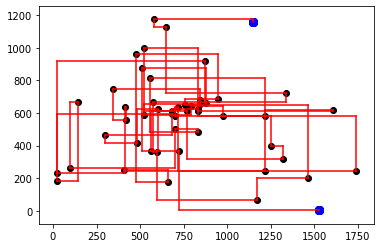

In [27]:
plot_best_path(best_route)